In [2]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import panel as pn
pn.extension()

import scipy.stats as stats
import scipy.special as spec
import seaborn as sns
import pandas as pd
sns.set()

%config InlineBackend.figure_foramt = 'retina'

# MDN1 mRNA count distribution

In [7]:
data = pd.read_csv('data/mRNA_MDN1.csv')
df = pd.DataFrame(data,columns=['mRNA_count', 'probability', 'error'])
df.head(10)

,mRNA_count,probability,error
0,0,0.003460,0.006055
1,1,0.027682,0.018166
2,2,0.040657,0.025087
3,3,0.092561,0.038062
4,4,0.124567,0.032872
5,5,0.172145,0.043253
6,6,0.149654,0.025952
7,7,0.109862,0.048443
8,8,0.116782,0.044118
9,9,0.074394,0.038062


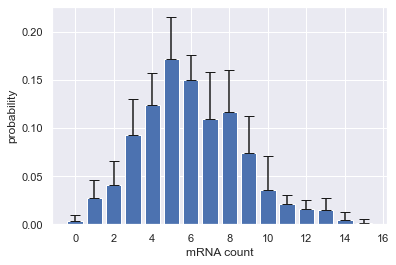

In [15]:
plt.bar(df.mRNA_count, df.probability)
plt.xlabel('mRNA count')
plt.ylabel('probability')
plotline, caplines, barlinecols = plt.errorbar(df.mRNA_count,df.probability,yerr=df.error, ecolor='k',capsize=5,lolims=True, fmt='none')
caplines[0].set_marker('_')
# lolims where error bars starts at the data point directly, fmt = none removes line across all points


Poisson distribution: probability of $k$ counts
$$P(X=k)= \frac{\lambda ^k e^{-\lambda }}{k!}$$

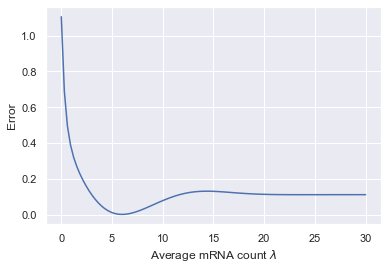

In [17]:
# fit poisson distribution onto mRNA distribution!
# using chi^2 error fit
def err(dat, count, rate):
    theory = rate**count * np.exp(-1*rate)/spec.factorial(count)
    return np.sum((theory-dat)**2)

n_points = 100 # number of points to plot
lambdas = np.linspace(0, 30, n_points) # range of lambda to test

error = np.zeros(n_points) # initalize error array

for i in range(n_points):
    error[i] = err(df.probability, df.mRNA_count, lambdas[i])

plt.plot(lambdas, error)
plt.xlabel('Average mRNA count $\lambda$')
plt.ylabel('Error');

In [19]:
# index of optimal lambda
ind_optimal = np.where(error == np.min(error))
lambda_fit = lambdas[ind_optimal]
print(lambda_fit)

[6.06060606]


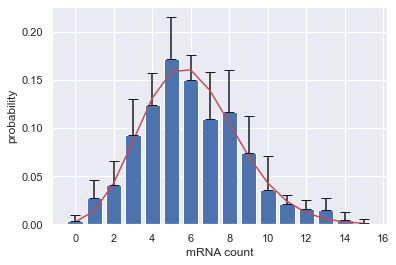

In [20]:
# poisson fit 

plt.bar(df.mRNA_count, df.probability)
plt.plot(df.mRNA_count, ((lambda_fit**df.mRNA_count)*np.exp(-lambda_fit)/spec.factorial(df.mRNA_count)), color='r')
plt.xlabel('mRNA count')
plt.ylabel('probability')
plotline, caplines, barlinecols = plt.errorbar(df.mRNA_count,df.probability,yerr=df.error, ecolor='k',capsize=5,lolims=True, fmt='none')
caplines[0].set_marker('_')

# PDR5 mRNA count distribution

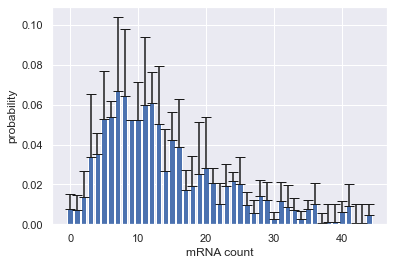

In [21]:
data_p = pd.read_csv('data/mRNA_PDR5.csv')
df_p = pd.DataFrame(data_p,columns=['mRNA_count', 'probability', 'error'])

plt.bar(df_p.mRNA_count, df_p.probability)
plt.xlabel('mRNA count')
plt.ylabel('probability')
plotline, caplines, barlinecols = plt.errorbar(df_p.mRNA_count,df_p.probability,yerr=df_p.error, ecolor='k',capsize=5,lolims=True, fmt='none')
caplines[0].set_marker('_')
# lolims where error bars starts at the data point directly, fmt = none removes line across all points


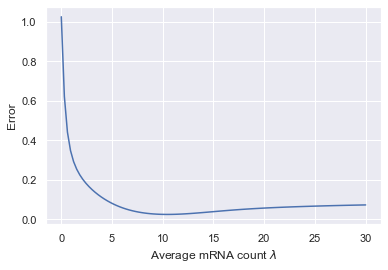

In [22]:
n_points = 100 # number of points to plot
lambdas = np.linspace(0, 30, n_points) # range of lambda to test

error_p = np.zeros(n_points) # initalize error array

for i in range(n_points):
    error_p[i] = err(df_p.probability, df_p.mRNA_count, lambdas[i])

plt.plot(lambdas, error_p)
plt.xlabel('Average mRNA count $\lambda$')
plt.ylabel('Error');

Not a constitutive promoter! Able to generate more at a greater rate, with bursts and starts to transcription :>
The plot actually follows more closely to a negative binomial distribution

## Negative binomial distribution

$$P(k)={k+n-1 \choose n-1}p^n (1-p)^k$$

where
$k$ is the number of failures, $n$ is the number of successes, and $p$ is the probability of single successes.

Note that $n$ is related to the frequency of bursts, whereas $p$ is related to the length of bursts (i.e. the longer the burst, the smaller the $p$). Thus, we have that $k$ is the mRNA count.